# Análisis Exploratorio y Visualización (tips dataset)

## Librerías necesarias

In [59]:
import numpy as np
import pandas as pd
# Para gráficas
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Cada gráfico me lo pondrá en el libro
%matplotlib inline 

## Cargar el dataset

In [60]:
xlsTips = 'tips.xlsx'
dfTips = pd.read_excel(xlsTips)

In [61]:
dfTips.shape

(244, 7)

In [62]:
dfTips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [63]:
dfTips.index

RangeIndex(start=0, stop=244, step=1)

In [64]:
dfTips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [65]:
dfTips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [66]:
dfTips.get_dtype_counts()

float64    2
int64      1
object     4
dtype: int64

In [67]:
dfTips.head(n=2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [68]:
# Últimos dos registros
dfTips.tail(n=2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [69]:
# Fila, columna
dfTips.iloc[2,2]

'Male'

In [70]:
dfTips.loc[2,'sex']

'Male'

In [71]:
dfTips.iloc[0]

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

In [72]:
dfTips.iloc[-1]

total_bill     18.78
tip             3.00
sex           Female
smoker            No
day             Thur
time          Dinner
size               2
Name: 243, dtype: object

In [73]:
dfTips.groupby('smoker')['tip'].sum() / dfTips.groupby('smoker')['total_bill'].sum()

smoker
No    0.16
Yes   0.14
dtype: float64

In [74]:
dfTips.iloc[[0,49,99]]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
49,18.04,3.00,Male,No,Sun,Dinner,2
99,12.46,1.50,Male,No,Fri,Dinner,2


In [75]:
dfTips.groupby('day')['tip'].sum() / dfTips.groupby('day')['total_bill'].sum()

day
Fri    0.16
Sat    0.15
Sun    0.15
Thur   0.16
dtype: float64

In [76]:
dfTips.describe()

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [77]:
print(dfTips['day'].unique())
print(dfTips['time'].unique())
print(dfTips['sex'].unique())

['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']
['Female' 'Male']


In [78]:
dfTips[['time','day','sex']].head(n=3)

,time,day,sex
0,Dinner,Sun,Female
1,Dinner,Sun,Male
2,Dinner,Sun,Male


In [79]:
dfTipsFemale = dfTips.query('sex == "Female"')
dfTipsMale = dfTips.query('sex == "Male"')
pd.concat([dfTipsFemale.head(),dfTipsMale.head()], axis = 1, keys = ['Female', 'Male'])

Female                                             Male             \
   total_bill  tip     sex smoker  day    time size total_bill  tip   sex   
0       16.99 1.01  Female     No  Sun  Dinner 2.00        nan  nan   NaN   
1         nan  nan     NaN    NaN  NaN     NaN  nan      10.34 1.66  Male   
2         nan  nan     NaN    NaN  NaN     NaN  nan      21.01 3.50  Male   
3         nan  nan     NaN    NaN  NaN     NaN  nan      23.68 3.31  Male   
4       24.59 3.61  Female     No  Sun  Dinner 4.00        nan  nan   NaN   
5         nan  nan     NaN    NaN  NaN     NaN  nan      25.29 4.71  Male   
6         nan  nan     NaN    NaN  NaN     NaN  nan       8.77 2.00  Male   
11      35.26 5.00  Female     No  Sun  Dinner 4.00        nan  nan   NaN   
14      14.83 3.02  Female     No  Sun  Dinner 2.00        nan  nan   NaN   
16      10.33 1.67  Female     No  Sun  Dinner 3.00        nan  nan   NaN   

                             
   smoker  day    time size  
0     NaN  NaN     NaN  nan  
1      No  Sun  Dinner 3.00  
2      No  Sun  Dinner 3.00  
3      No  Sun  Dinner 2.00  
4     NaN  NaN     NaN  nan  
5      No  Sun  Dinner 4.00  
6      No  Sun  Dinner 2.00  
11    NaN  NaN     NaN  nan  
14    NaN  NaN     NaN  nan  
16    NaN  NaN     NaN  nan

In [80]:
dfTipsFemale = dfTips.query('sex == "Female"')
dfTipsMale = dfTips.query('sex == "Male"')
pd.concat([dfTipsFemale.head().reset_index(),dfTipsMale.head().reset_index()], axis = 1, keys = ['Female', 'Male'])

Female                                                   Male             \
   index total_bill  tip     sex smoker  day    time size index total_bill   
0      0      16.99 1.01  Female     No  Sun  Dinner    2     1      10.34   
1      4      24.59 3.61  Female     No  Sun  Dinner    4     2      21.01   
2     11      35.26 5.00  Female     No  Sun  Dinner    4     3      23.68   
3     14      14.83 3.02  Female     No  Sun  Dinner    2     5      25.29   
4     16      10.33 1.67  Female     No  Sun  Dinner    3     6       8.77   

                                       
   tip   sex smoker  day    time size  
0 1.66  Male     No  Sun  Dinner    3  
1 3.50  Male     No  Sun  Dinner    3  
2 3.31  Male     No  Sun  Dinner    2  
3 4.71  Male     No  Sun  Dinner    4  
4 2.00  Male     No  Sun  Dinner    2

In [81]:
dfTipsFemale.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [82]:
dfTipsMale.head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [83]:
# Ver sólo un n número de decimales (.2f => 2 decimales)
# Todo el libro cambia
pd.options.display.float_format = '{:,.2f}'.format
pd.concat([dfTipsFemale.describe() , dfTipsMale.describe()], axis = 1, keys = ['Female', 'Male'])

Female                   Male              
      total_bill   tip  size total_bill    tip   size
count      87.00 87.00 87.00     157.00 157.00 157.00
mean       18.06  2.83  2.46      20.74   3.09   2.63
std         8.01  1.16  0.94       9.25   1.49   0.96
min         3.07  1.00  1.00       7.25   1.00   1.00
25%        12.75  2.00  2.00      14.00   2.00   2.00
50%        16.40  2.75  2.00      18.35   3.00   2.00
75%        21.52  3.50  3.00      24.71   3.76   3.00
max        44.30  6.50  6.00      50.81  10.00   6.00

## Análisis de una variable

### Visualización de una dimensión

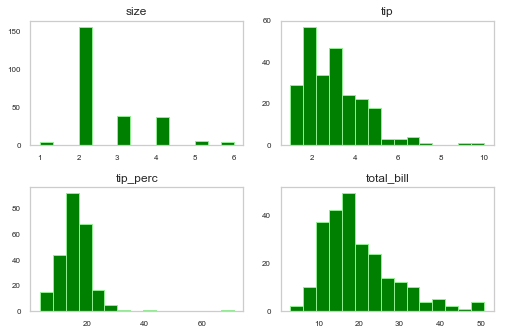

In [128]:
dfTips.hist(bins=15 , color='green' , edgecolor='lightgreen' , linewidth=1.0 ,
            xlabelsize=8 , ylabelsize=8 , grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))

/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


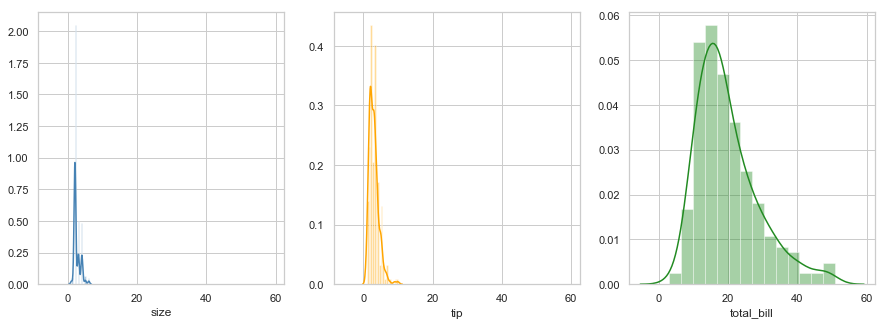

In [133]:
# Matplotlib (15,5) para que queden posicionadas como estan (15 de largo y 5 de ancho)
f, axes = plt.subplots(1,3,figsize=(15,5),sharex=True)
sns.distplot(dfTips['size'], color='steelblue', ax=axes[0])
sns.distplot(dfTips['tip'], color='orange', ax=axes[1])
sns.distplot(dfTips['total_bill'], color='forestgreen', ax=axes[2])

In [113]:
dfTips['tip_perc'] = 100*dfTips['tip'] / dfTips['total_bill']
dfTips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'tip_perc'],
      dtype='object')

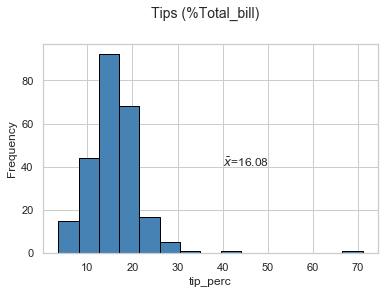

In [114]:
fig = plt.figure(figsize=(6,4))
title = fig.suptitle("Tips (%Total_bill)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("tip_perc")
ax.set_ylabel("Frequency")
ax.text(40,40, r'$\bar{x}$='+str(round(dfTips['tip_perc'].mean(),2)), fontsize=12)
freq, bins, patches = ax.hist(dfTips['tip_perc'], color='steelblue', bins=15, edgecolor='black', linewidth=1)


/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


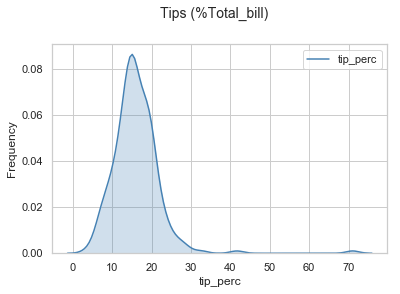

In [135]:
fig = plt.figure(figsize=(6,4))
title = fig.suptitle("Tips (%Total_bill)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("tip_perc")
ax.set_ylabel("Frequency")
sns.kdeplot(dfTips['tip_perc'], ax=ax, shade=True, color='steelblue')

/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


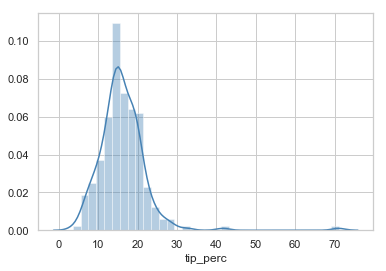

In [137]:
sns.distplot(dfTips['tip_perc'], color='steelblue')

### Categorías

In [90]:
pd.DataFrame(dfTips.sex.value_counts())

,sex
Male,157
Female,87


In [91]:
# Normalizarlo es convertirlo a porcentaje del total
pd.DataFrame(dfTips.sex.value_counts(normalize=True))

,sex
Male,0.64
Female,0.36


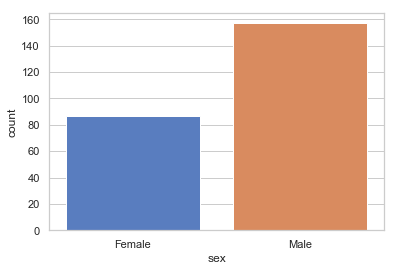

In [136]:
sns.countplot(x='sex', data=dfTips, palette='muted')

In [93]:
from scipy.stats import ttest_ind
dfTipsFemale = dfTips.query('sex == "Female"')
dfTipsMale = dfTips.query('sex == "Male"')

ttest_ind(dfTipsFemale['tip_perc'], dfTipsMale['tip_perc'])

# p value > 0.05, no se rechaza. media1=media2

Ttest_indResult(statistic=1.0833972270478005, pvalue=0.2797103849605485)

/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


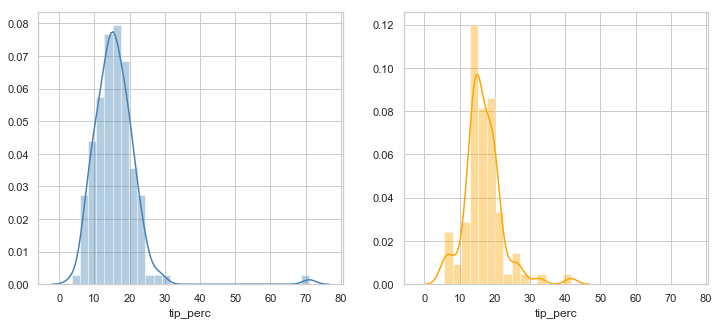

In [138]:
f, axes = plt.subplots(1,2, figsize=(12,5), sharex= True)
sns.distplot(dfTipsMale['tip_perc'], color="steelblue",ax=axes[0])
sns.distplot(dfTipsFemale['tip_perc'], color="orange",ax=axes[1])

# 1030

## Análisis Multivariable

### Correlaciones

In [95]:
dfTips.corr()

,total_bill,tip,size,tip_perc
total_bill,1.00,0.68,0.60,-0.34
tip,0.68,1.00,0.49,0.34
size,0.60,0.49,1.00,-0.14
tip_perc,-0.34,0.34,-0.14,1.00


Text(0.5,0.98,'Tips Variables Correlation Heatmap')

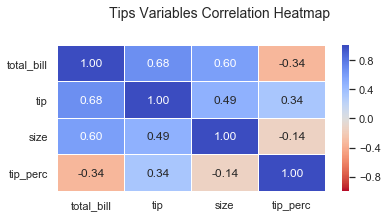

In [155]:
f, ax = plt.subplots(figsize = (6,3))
corr = dfTips.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap = "coolwarm_r",
                fmt='.2f', linewidths=0.05, vmin=-1, vmax=1)
f.subplots_adjust(top=0.8)
f.suptitle("Tips Variables Correlation Heatmap", fontsize=14)

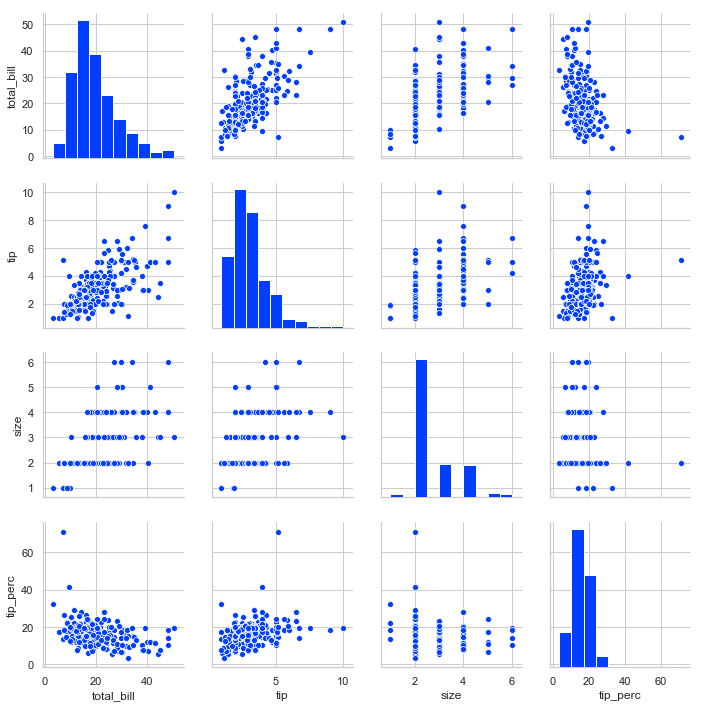

In [140]:
sns.pairplot(dfTips)
# sns.pairplot(dfTips, height=2.5)

In [98]:
dfTips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
tip_perc      244 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.3+ KB


/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


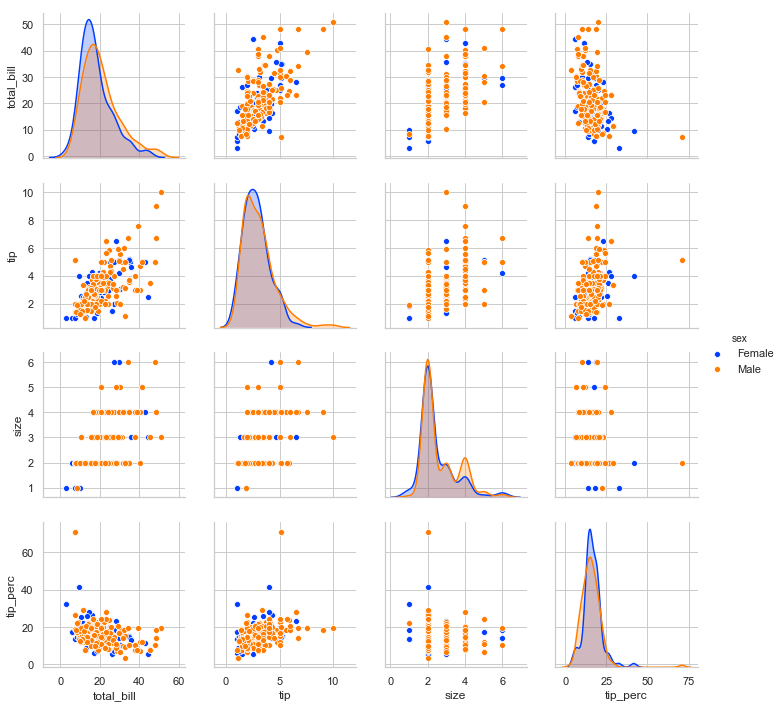

In [141]:
sns.pairplot(dfTips, hue='sex')

In [100]:
sns.__version__
# 0.9.0 para que salga la dist normal

'0.9.0'

/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


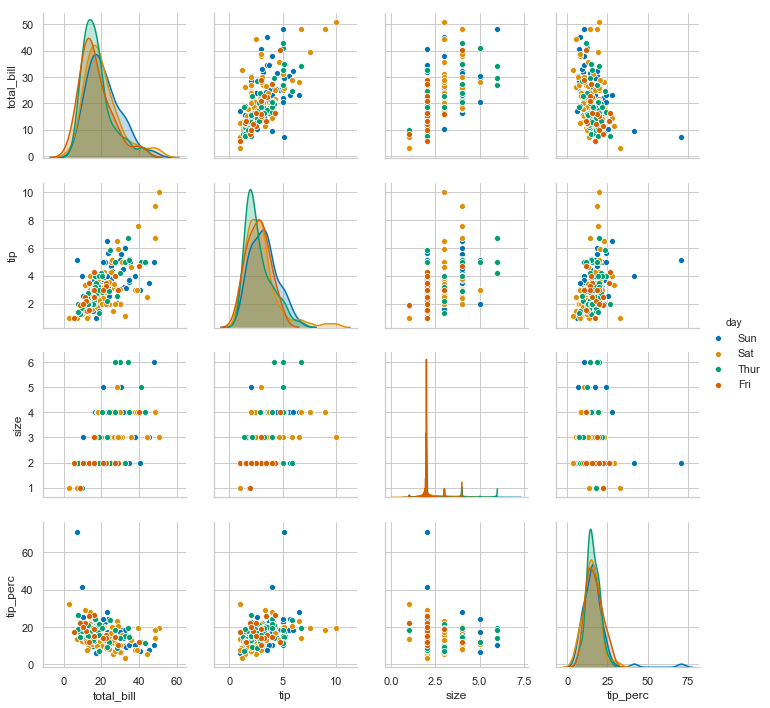

In [142]:
sns.pairplot(dfTips, hue='day', palette="colorblind")
# deep, muted, pastel
# bright, dark

### Coordenadas paralelas

In [102]:
import sklearn.preprocessing as pp
cols = ['size', 'tip', 'total_bill']
scaler = pp.StandardScaler()
scaled_dfTips = scaler.fit_transform(dfTips[cols])
scaled_dfTips = pd.DataFrame(scaled_dfTips, columns = cols)
final_dfTips = pd.concat([scaled_dfTips, dfTips['sex']], axis=1)
final_dfTips.head()

,size,tip,total_bill,sex
0,-0.60,-1.44,-0.31,Female
1,0.45,-0.97,-1.06,Male
2,0.45,0.36,0.14,Male
3,-0.60,0.23,0.44,Male
4,1.51,0.44,0.54,Female


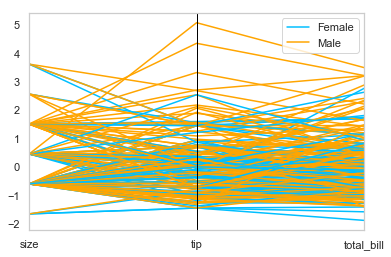

In [103]:
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_dfTips, 'sex', color=('deepskyblue','orange'))

### Dos variables cuantitativas (gráfico de dispersión)

/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


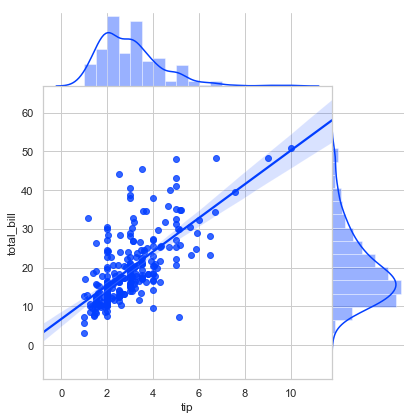

In [156]:
sns.jointplot(x='tip', y='total_bill', data=dfTips, kind='reg', space=0, ratio=4)

### Variables cuantitativas y categorías

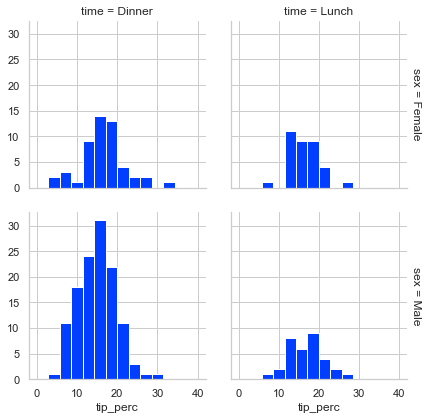

In [157]:
grid = sns.FacetGrid(dfTips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, "tip_perc", bins=np.linspace(0,40,15));

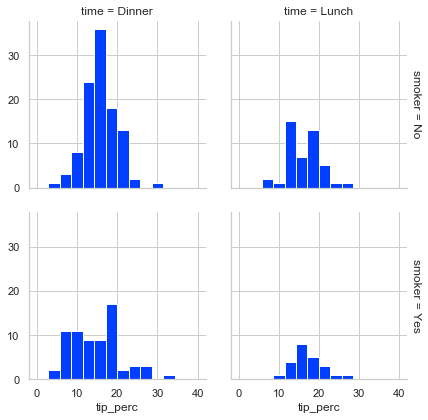

In [158]:
gridS = sns.FacetGrid(dfTips, row='smoker', col='time', margin_titles=True)
gridS.map(plt.hist, "tip_perc", bins=np.linspace(0,40,15));

### Box Plots

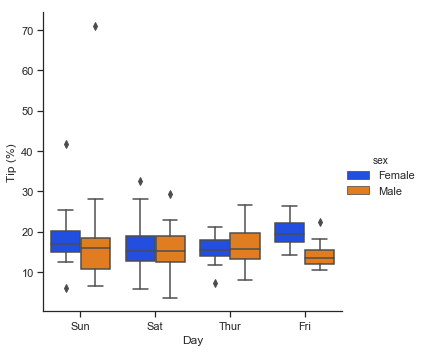

In [107]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "tip_perc", "sex", data=dfTips, kind="box")
    g.set_axis_labels("Day", "Tip (%)")

In [108]:
# PRUEBA DE MEDIAS
# VER P VALUE

from scipy.stats import ttest_ind
dfTipsFemaleFri = dfTips.query('sex=="Female"').query('day=="Fri"')
dfTipsMaleFri = dfTips.query('sex=="Male"').query('day=="Fri"')
ttest_ind(dfTipsFemaleFri['tip_perc'], dfTipsMaleFri['tip_perc'])

Ttest_indResult(statistic=3.114352270662731, pvalue=0.0063074821318122075)

/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


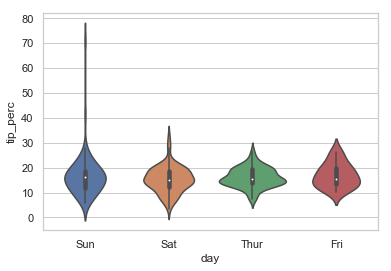

In [159]:
sns.violinplot(x='day', y='tip_perc', data=dfTips, palette='deep')

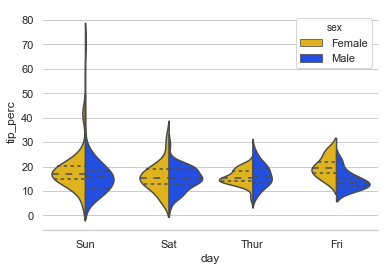

In [110]:
sns.set(style='whitegrid', palette='bright', color_codes=True)
sns.violinplot(x='day', y='tip_perc', hue='sex', split=True, inner='quart', palette={"Male":"b", "Female":"y"}, data=dfTips)
sns.despine(left=True)